# Consigna de trabajo

A partir del dataset de radios censales visto en la clase 1 (Precenso de Viviendas), deberán:

1. Cargar el archivo geojson del directorio data y guardarlo en un nuevo objeto.
2. Filtrar una provincia
3. Explorar la distribución del indicador `ind07`
4. Hacer un mapa indicando los radios censales que se encuentran por encima del percentil 75 de la distribución. Pista: para hacerlo vas a tener que visualizar dos geodataframes sobre el mismo `ax`.

# 1. Carga del dataset

In [ ]:
!pip install geopandas

In [1]:
from google.colab import drive

In [2]:
drive.mount('/drive/')

Mounted at /drive/


In [1]:
import geopandas as gpd

In [2]:
gdf = gpd.read_file('/drive/MyDrive/Gestion de ciudades/data/precenso viviendas/radios.json')

#2. Filtro por provincia

In [3]:
gdf.prov.value_counts() # mis opciones

06    16302
02     3778
82     3010
14     2973
50     1530
90     1158
66      941
54      915
30      833
62      785
58      624
38      604
70      598
26      553
86      550
22      481
18      455
34      455
74      447
42      413
10      289
46      242
94      141
78      139
Name: prov, dtype: int64

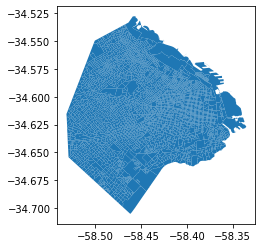

In [4]:
gdf = gdf.loc[gdf['prov']=='02',:].copy() # me quedo con caba
gdf.plot();

# 3. Explorar la distribución de ind07

In [16]:
# Recasteamos la variable como float
gdf['ind07'] = gdf['ind07'].astype(float)

In [17]:
# podriamos ver el porcentaje promedio de deptos en altura para las comunas
gdf.groupby('nomdepto')['ind07'].mean()

nomdepto
Comuna 1     64.893429
Comuna 10    38.436000
Comuna 11    48.427119
Comuna 12    58.016479
Comuna 13    73.836364
Comuna 14    75.943478
Comuna 15    57.262602
Comuna 2     64.741089
Comuna 3     63.160700
Comuna 4     39.926515
Comuna 5     58.184889
Comuna 6     69.148261
Comuna 7     52.368797
Comuna 8     28.097906
Comuna 9      0.000000
Name: ind07, dtype: float64

In [19]:
# o bien plotear los radios que estan en el percentil mas alto
gdf.ind07.describe()

count    3778.000000
mean       55.153150
std        42.623035
min         0.000000
25%         0.000000
50%        74.650000
75%        96.000000
max       100.000000
Name: ind07, dtype: float64

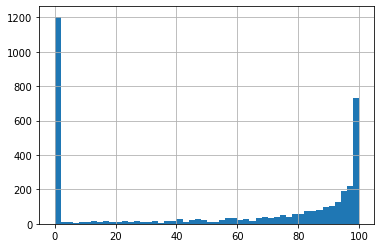

In [23]:
gdf.ind07.hist(bins=50);

# 4. Mapa de los radios censales con mayor densidad en altura

In [21]:
import matplotlib.pyplot as plt

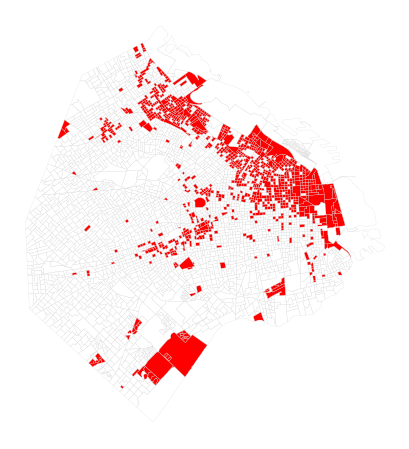

In [26]:
f, ax = plt.subplots(figsize=(12,8))
gdf.loc[gdf.ind07 >= 96].plot(ax=ax, color='red')
gdf.geometry.boundary.plot(ax=ax, color='lightgrey',linewidth=0.2)
ax.set_axis_off();